In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate
import scipy.optimize
from pandas import *
from jupyterthemes import jtplot
import numba as nb
import matplotlib.pyplot as plt
import matplotlib as mtp

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy import signal
#%matplotlib notebook
plt.rcParams["font.size"]="16"
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['figure.figsize'] = [6, 5]

In [2]:
pe = np.loadtxt('pe_neb.txt')
s = np.loadtxt('S_cut_off_10.txt')

T1 = 100 # nuc temperature
T2 = 300 
T3 = 500

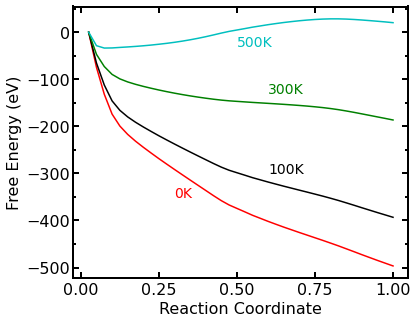

In [13]:
fig, ax1 = plt.subplots()
ax1.xaxis.set_major_locator(MultipleLocator(0.25))
ax1.xaxis.set_minor_locator(AutoMinorLocator(0.25))
ax1.yaxis.set_major_locator(MultipleLocator(100.))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'major')
plt.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')


ax1.plot(pe[:,0]/pe[-1,0], pe[:,1] - pe[0,1], 'r-')
ax1.plot(pe[:,0]/pe[-1,0], pe[:,1] - pe[0,1] - T1*s , 'k-')
ax1.plot(pe[:,0]/pe[-1,0], pe[:,1] - pe[0,1] - T2*s , 'g-')
ax1.plot(pe[:,0]/pe[-1,0], pe[:,1] - pe[0,1] - T3*s , 'c-')

ax1.annotate('' + '{:d}'.format(0)+'K', (.3, -350), color='r', size=14)
ax1.annotate('' + '{:d}'.format(T1)+'K', (.6, -300), color='k', size=14)
ax1.annotate('' + '{:d}'.format(T2)+'K', (.6, -130), color='g', size=14)
ax1.annotate('' + '{:d}'.format(T3)+'K', (.5, -30), color='c', size=14)

# ax1.set_xlim(-0.01,0.85)
# ax1.set_ylim(-.5, 4)
ax1.set_ylabel('Free Energy (eV)')
ax1.set_xlabel('Reaction Coordinate')

# ax2 = ax1.twinx()
# ax2.semilogy(r_comp, np.exp(s_comp/8.617e-5)*1e12, 'b-')
# ax2.semilogy(pe_neb[:,0], np.exp(s_neb/8.617e-5)*1e12, 'bo')

# # ax2.semilogy(r_nuc, np.exp(s_nuc/8.617e-5)*1e12,'k*', markersize=12)
# # ax2.semilogy(np.linspace(.045,.5,10), np.exp(s_nuc/8.617e-5)*1e12*np.ones((10,)),'b--')
# # ax1.annotate('' + '{:.2E}'.format(np.exp(s_nuc/8.617e-5)*1e12)+' /s', (.35, pe_nuc+1.2), color='b', size='14')
# ax2.tick_params(direction = 'in', length = 6, top = True, color = 'blue', labelcolor='blue', right = True, which = 'major')
# ax2.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')
# ax2.set_ylabel(r'$\nu_0 e^{S/K_b}$ (/s)', color='b')
# ax2.spines['right'].set_color('blue')

plt.savefig('free_energy_tension.png', bbox_inches='tight', dpi=600)

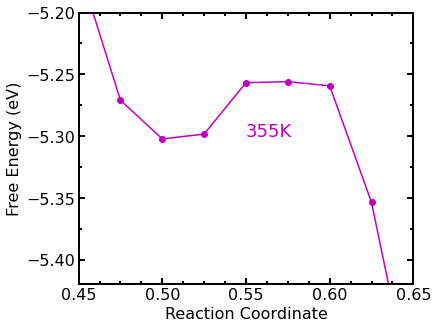

In [4]:
T_example = 355
fig, ax1 = plt.subplots()
ax1.xaxis.set_major_locator(MultipleLocator(0.05))
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_major_locator(MultipleLocator(.05))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'major')
plt.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')



ax1.plot(pe[:,0]/pe[-1,0], pe[:,1] - pe[0,1] - T_example*s + 100 , 'mo-')
ax1.annotate('' + '{:d}'.format(T_example)+'K', (.55, -5.30), color='m', size=18)
plt.ylim(-5.42,-5.2)
plt.xlim(.45,.65)
ax1.set_ylabel('Free Energy (eV)')
ax1.set_xlabel('Reaction Coordinate')
plt.savefig(f'{T_example}_free_energy_barrier.png', bbox_inches='tight', dpi=600)

In [5]:
Fb = np.loadtxt('Free_energy_barrier_vs_Temp.txt')

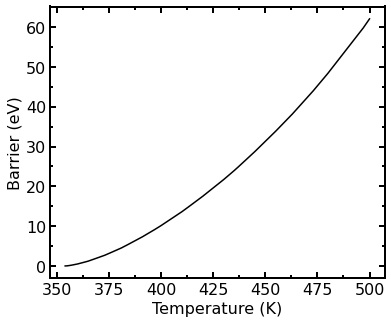

In [6]:
fig, ax1 = plt.subplots()
ax1.xaxis.set_major_locator(MultipleLocator(25))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'major')
plt.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')



ax1.plot(Fb[:,0], Fb[:,1] , 'k')
# ax1.annotate('' + '{:d}'.format(T_example)+'K', (.55, -5.30), color='m', size=18)
# plt.ylim(-5.42,-5.2)
# plt.xlim(.45,.65)
ax1.set_ylabel('Barrier (eV)')
ax1.set_xlabel('Temperature (K)')
plt.savefig('Temp_free_energy_barrier.png', bbox_inches='tight', dpi=600)

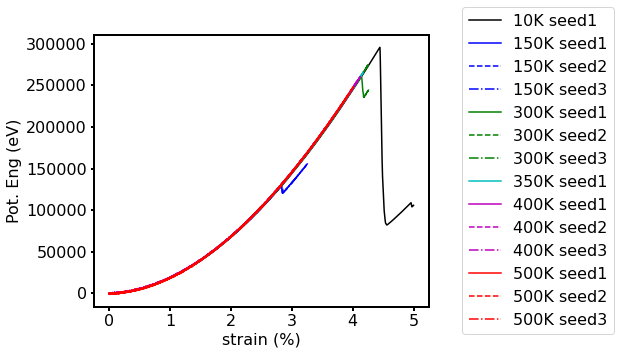

In [10]:
import pandas as pd
def read_log(filename):
    with open(filename) as file:
        lines= file.readlines()
    with open('cache', 'w') as file:
        file.writelines(lines[198:198+5000])
    return pd.read_csv('cache', '\s+')

color = ['k', 'b', 'g', 'c', 'm', 'r']
ic= 0

for temp in [10, 150, 300, 350, 400, 500]:
    offset = 0 # temp*100
    data = read_log(f'log.lammps.{temp}K')
    L0 = data.loc[0,'Lx']
    if temp == 150:
        data = data[:-1500]
    plt.plot((data.Lx-L0)/L0*100, data.PotEng - data.PotEng[0] + offset, color[ic], label=f'{temp}K seed1')
            
    
    if temp not in [10,350]:
            
                
            data_s2 = read_log(f'log.lammps.{temp}K.seed_2')
            if temp == 150:
                data_s2 = data_s2[:-1500]
            
            L0 = data_s2.loc[0,'Lx']
            plt.plot((data_s2.Lx-L0)/L0*100, data_s2.PotEng - data_s2.PotEng[0] + offset, color[ic]+str('--'), label=f'{temp}K seed2')
            
            
            data_s3 = read_log(f'log.lammps.{temp}K.seed_3')
            
            if temp == 150:
                data_s3 = data_s3[:-1500]
                
            L0 = data_s3.loc[0,'Lx']
            plt.plot((data_s3.Lx-L0)/L0*100, data_s3.PotEng - data_s3.PotEng[0] + offset, color[ic]+str('-.'), label=f'{temp}K seed3')
    ic+=1       
#     plt.xlim(2.82,2.85)
#     plt.ylim(-1.3318e8, -1.3317e8)
    plt.xlabel('strain (%)')
    plt.ylabel('Pot. Eng (eV)')
    plt.legend(loc=(1.1,-.1))
    
plt.savefig('strain_rate_Pot_energy_nucleation.png', bbox_inches='tight', dpi=600)

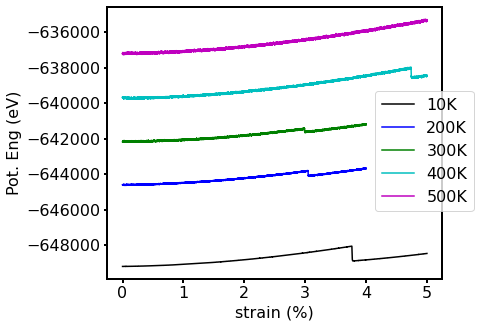

In [34]:
color = ['k', 'b', 'g', 'c', 'm', 'r']
ic= 0

for temp in [10, 200, 300, 400, 500]:
    data = read_csv(f'0.2mil_atoms_data/data_{temp}K', sep='\s+', skiprows=[13774,13775,13776])

    L0 = data.loc[0,'Lx']
    plt.plot((data.Lx - L0)/L0*100, data.PotEng, c=color[ic], label=f'{temp}K')
    ic+=1
plt.legend(loc=(.8, 0.25))   
plt.xlabel('strain (%)')
plt.ylabel('Pot. Eng (eV)')
plt.savefig('strain_rate_Pot_energy_nucleation.png', bbox_inches='tight', dpi=600)